In [1]:
import tensorflow as tf
import pandas as pd
tf.keras.utils.get_file(
    "bike_sharing_dataset.zip",
    "https://archive.ics.uci.edu/static/public/275/bike+sharing+dataset.zip",
    cache_dir=".",
    extract=True
)


'.\\datasets\\bike_sharing_dataset.zip'

In [2]:
df = pd.read_csv('datasets/hour.csv',
    parse_dates={'datetime': ['dteday', 'hr']},
    date_format='%Y-%m-%d %H',
    index_col='datetime'
)
df

C:\Users\wiech\AppData\Local\Temp\ipykernel_3404\401702248.py:1: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df = pd.read_csv('datasets/hour.csv',


,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
datetime,,,,,,,,,,,,,,,
2011-01-01 00:00:00,1,1,0,1,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
2011-01-01 01:00:00,2,1,0,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2011-01-01 02:00:00,3,1,0,1,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
2011-01-01 03:00:00,4,1,0,1,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
2011-01-01 04:00:00,5,1,0,1,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-12-31 19:00:00,17375,1,1,12,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
2012-12-31 20:00:00,17376,1,1,12,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
2012-12-31 21:00:00,17377,1,1,12,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90


In [3]:
print((df.index.min(), df.index.max()))


(Timestamp('2011-01-01 00:00:00'), Timestamp('2012-12-31 23:00:00'))


In [4]:
print((365 + 366) * 24 - len(df))

165


In [5]:
df = pd.concat([
    df[['casual', 'registered', 'cnt']].resample('h').sum().fillna(0),
    df[['temp', 'atemp', 'hum', 'windspeed']].resample('h').interpolate(),
    df[['holiday', 'weekday', 'workingday', 'weathersit']].asfreq('h').ffill()
], axis=1)
df
               

,casual,registered,cnt,temp,atemp,hum,windspeed,holiday,weekday,workingday,weathersit
datetime,,,,,,,,,,,
2011-01-01 00:00:00,3,13,16,0.24,0.2879,0.81,0.0000,0.0,6.0,0.0,1.0
2011-01-01 01:00:00,8,32,40,0.22,0.2727,0.80,0.0000,0.0,6.0,0.0,1.0
2011-01-01 02:00:00,5,27,32,0.22,0.2727,0.80,0.0000,0.0,6.0,0.0,1.0
2011-01-01 03:00:00,3,10,13,0.24,0.2879,0.75,0.0000,0.0,6.0,0.0,1.0
2011-01-01 04:00:00,0,1,1,0.24,0.2879,0.75,0.0000,0.0,6.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
2012-12-31 19:00:00,11,108,119,0.26,0.2576,0.60,0.1642,0.0,1.0,1.0,2.0
2012-12-31 20:00:00,8,81,89,0.26,0.2576,0.60,0.1642,0.0,1.0,1.0,2.0
2012-12-31 21:00:00,7,83,90,0.26,0.2576,0.60,0.1642,0.0,1.0,1.0,1.0


In [6]:
df.notna().sum()


casual        17544
registered    17544
cnt           17544
temp          17544
atemp         17544
hum           17544
windspeed     17544
holiday       17544
weekday       17544
workingday    17544
weathersit    17544
dtype: int64

In [7]:
df[['casual', 'registered', 'cnt', 'weathersit']].describe()


,casual,registered,cnt,weathersit
count,17544.000000,17544.000000,17544.000000,17544.000000
mean,35.340686,152.340515,187.681202,1.434223
std,49.193293,151.373409,181.456478,0.648339
min,0.000000,0.000000,0.000000,1.000000
25%,4.000000,32.000000,38.000000,1.000000
50%,16.000000,114.000000,140.000000,1.000000
75%,48.000000,219.000000,279.000000,2.000000
max,367.000000,886.000000,977.000000,4.000000


In [8]:
df.casual /= 1e3
df.registered /= 1e3
df.cnt /= 1e3
df.weathersit /= 4


<Axes: xlabel='datetime'>

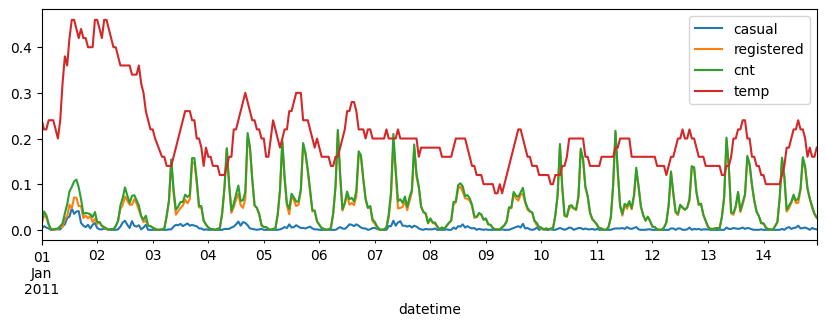

In [9]:
df_2weeks = df[:24 * 7 * 2]
df_2weeks[['casual', 'registered', 'cnt', 'temp']].plot(figsize=(10, 3))

<Axes: xlabel='datetime'>

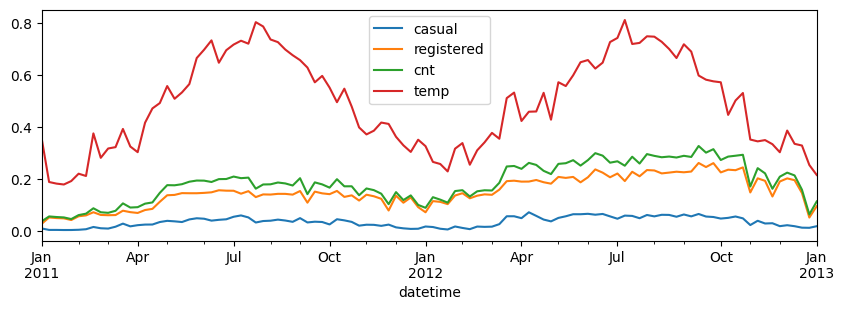

In [10]:
df_daily = df.resample('W').mean()
df_daily[['casual', 'registered', 'cnt', 'temp']].plot(figsize=(10, 3))


In [11]:
import pickle
mae_daily = df['cnt'].diff(24).abs().mean() * 1e3
mae_weekly = df['cnt'].diff(24*7).abs().mean() * 1e3
mae_baseline = (mae_daily, mae_weekly)
print(mae_baseline)
with open('mae_baseline.pkl', 'wb') as f:
    pickle.dump(mae_baseline, f)


(63.79497716894976, 52.42506906077348)


In [12]:
cnt_train = df['cnt']['2011-01-01 00:00':'2012-06-30 23:00']
cnt_valid = df['cnt']['2012-07-01 00:00':]
seq_len = 1 * 24
train_ds = tf.keras.utils.timeseries_dataset_from_array(
    cnt_train.to_numpy(),
    targets=cnt_train[seq_len:],
    sequence_length=seq_len,
    batch_size=32,
    shuffle=True,
    seed=42
)
valid_ds = tf.keras.utils.timeseries_dataset_from_array(
    cnt_valid.to_numpy(),
    targets=cnt_valid[seq_len:],
    sequence_length=seq_len,
    batch_size=32
)

In [13]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape=[seq_len])
])


C:\Users\wiech\PycharmProjects\um\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [14]:
optimizer = tf.keras.optimizers.SGD(momentum=0.9)
model.compile(metrics=["mae"], optimizer=optimizer, loss=tf.keras.losses.Huber())


In [15]:

history = model.fit(train_ds, epochs=20,
                    validation_data=valid_ds)


model.save('model_linear.keras')
print((model.evaluate(valid_ds)))
tpl = tuple((model.evaluate(valid_ds)[1],))
with open('mae_linear.pkl', 'wb') as f:
    pickle.dump(tpl, f)

Epoch 1/20
410/410 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0146 - mae: 0.1184 - val_loss: 0.0074 - val_mae: 0.0873
Epoch 2/20
410/410 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0033 - mae: 0.0570 - val_loss: 0.0057 - val_mae: 0.0765
Epoch 3/20
410/410 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0027 - mae: 0.0516 - val_loss: 0.0050 - val_mae: 0.0721
Epoch 4/20
410/410 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0025 - mae: 0.0494 - val_loss: 0.0047 - val_mae: 0.0694
Epoch 5/20
410/410 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0023 - mae: 0.0473 - val_loss: 0.0045 - val_mae: 0.0675
Epoch 6/20
410/410 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0023 - mae: 0.0463 - val_loss: 0.0044 - val_mae: 0.0662
Epoch 7/20
410/410 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0022 - mae: 0.0455 - val_loss: 0.0043 - val_mae: 0.0648
Epoch 8/20
410/410 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0022 - mae: 0.0447 - val_loss: 0.0042 - val_mae: 0.0640
Epoch 9/20
410/410 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - lo

In [16]:
model = tf.keras.Sequential([
    tf.keras.layers.SimpleRNN(1, input_shape=[None, 1])
])
optimizer = tf.keras.optimizers.SGD(momentum=0.9)
model.compile(metrics=["mae"], optimizer=optimizer, loss=tf.keras.losses.Huber())
history = model.fit(train_ds, epochs=20,
validation_data=(valid_ds))

Epoch 1/20


C:\Users\wiech\PycharmProjects\um\.venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


410/410 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 0.0165 - mae: 0.1251 - val_loss: 0.0091 - val_mae: 0.0941
Epoch 2/20
410/410 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0043 - mae: 0.0653 - val_loss: 0.0085 - val_mae: 0.0899
Epoch 3/20
410/410 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0040 - mae: 0.0627 - val_loss: 0.0081 - val_mae: 0.0872
Epoch 4/20
410/410 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0038 - mae: 0.0610 - val_loss: 0.0077 - val_mae: 0.0845
Epoch 5/20
410/410 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0037 - mae: 0.0593 - val_loss: 0.0074 - val_mae: 0.0827
Epoch 6/20
410/410 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0035 - mae: 0.0579 - val_loss: 0.0071 - val_mae: 0.0812
Epoch 7/20
410/410 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0034 - mae: 0.0570 - val_loss: 0.0069 - val_mae: 0.0797
Epoch 8/20
410/410 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0033 - mae: 0.0557 - val_loss: 0.0067 - val_mae: 0.0784
Epoch 9/20
410/410 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0033 

In [17]:
model.save('model_rnn1.keras')
print((model.evaluate(valid_ds)))
tpl = tuple((model.evaluate(valid_ds)[1],))
with open('mae_rnn1.pkl', 'wb') as f:
    pickle.dump(tpl, f)

138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0064 - mae: 0.0751
[0.005873245187103748, 0.07128757238388062]
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0064 - mae: 0.0751


In [18]:
model = tf.keras.Sequential([
    tf.keras.layers.SimpleRNN(32, return_sequences=True, input_shape=[None, 1]),
    tf.keras.layers.Dense(1)
])
optimizer = tf.keras.optimizers.SGD(momentum=0.9)
model.compile(metrics=["mae"], optimizer=optimizer, loss=tf.keras.losses.Huber())
history = model.fit(train_ds, epochs=20,
validation_data=(valid_ds))

Epoch 1/20
410/410 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - loss: 0.0180 - mae: 0.1451 - val_loss: 0.0306 - val_mae: 0.1832
Epoch 2/20
410/410 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0134 - mae: 0.1288 - val_loss: 0.0306 - val_mae: 0.1832
Epoch 3/20
410/410 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0132 - mae: 0.1279 - val_loss: 0.0291 - val_mae: 0.1798
Epoch 4/20
410/410 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0133 - mae: 0.1284 - val_loss: 0.0286 - val_mae: 0.1789
Epoch 5/20
410/410 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0132 - mae: 0.1283 - val_loss: 0.0296 - val_mae: 0.1807
Epoch 6/20
410/410 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0132 - mae: 0.1282 - val_loss: 0.0278 - val_mae: 0.1774
Epoch 7/20
410/410 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0131 - mae: 0.1281 - val_loss: 0.0281 - val_mae: 0.1779
Epoch 8/20
410/410 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0131 - mae: 0.1278 - val_loss: 0.0291 - val_mae: 0.1797
Epoch 9/20
410/410 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - lo

In [19]:
model.save('model_rnn32.keras')
print((model.evaluate(valid_ds)))
tpl = tuple((model.evaluate(valid_ds)[1],))
with open('mae_rnn32.pkl', 'wb') as f:
    pickle.dump(tpl, f)

138/138 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0316 - mae: 0.1902
[0.028497301042079926, 0.17861762642860413]
138/138 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0316 - mae: 0.1902


In [20]:
model = tf.keras.Sequential([
    tf.keras.layers.SimpleRNN(32, return_sequences=True, input_shape=[None, 1]),
    tf.keras.layers.SimpleRNN(32, return_sequences=True),
    tf.keras.layers.SimpleRNN(32, return_sequences=True),
    tf.keras.layers.Dense(1)
])
optimizer = tf.keras.optimizers.SGD(momentum=0.9)
model.compile(metrics=["mae"], optimizer=optimizer, loss=tf.keras.losses.Huber())
history = model.fit(train_ds, epochs=20,
validation_data=(valid_ds))

Epoch 1/20
410/410 ━━━━━━━━━━━━━━━━━━━━ 10s 15ms/step - loss: 0.0193 - mae: 0.1487 - val_loss: 0.0254 - val_mae: 0.1747
Epoch 2/20
410/410 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - loss: 0.0138 - mae: 0.1315 - val_loss: 0.0309 - val_mae: 0.1837
Epoch 3/20
410/410 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - loss: 0.0136 - mae: 0.1298 - val_loss: 0.0267 - val_mae: 0.1755
Epoch 4/20
410/410 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - loss: 0.0138 - mae: 0.1302 - val_loss: 0.0258 - val_mae: 0.1744
Epoch 5/20
410/410 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - loss: 0.0138 - mae: 0.1304 - val_loss: 0.0292 - val_mae: 0.1801
Epoch 6/20
410/410 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - loss: 0.0134 - mae: 0.1293 - val_loss: 0.0258 - val_mae: 0.1743
Epoch 7/20
410/410 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - loss: 0.0137 - mae: 0.1304 - val_loss: 0.0289 - val_mae: 0.1794
Epoch 8/20
410/410 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - loss: 0.0134 - mae: 0.1292 - val_loss: 0.0274 - val_mae: 0.1766
Epoch 9/20
410/410 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms

In [21]:
model.save('model_rnn_deep.keras')
print((model.evaluate(valid_ds)))
tpl = tuple((model.evaluate(valid_ds)[1],))
with open('mae_rnn_deep.pkl', 'wb') as f:
    pickle.dump(tpl, f)

138/138 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0356 - mae: 0.2006
[0.03177738934755325, 0.18583205342292786]
138/138 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0356 - mae: 0.2006


In [22]:
cnt_train = df[['cnt', 'weathersit', 'temp', 'workingday']]['2011-01-01 00:00':'2012-06-30 23:00']
cnt_valid = df[['cnt', 'weathersit', 'temp', 'workingday']]['2012-07-01 00:00':]
seq_len = 1 * 24
train_ds = tf.keras.utils.timeseries_dataset_from_array(
    cnt_train[['cnt', 'weathersit', 'temp', 'workingday']].to_numpy(),
    targets=cnt_train['cnt'][seq_len:].to_numpy(),
    sequence_length=seq_len,
    batch_size=32,
    shuffle=True,
    seed=42
)

valid_ds = tf.keras.utils.timeseries_dataset_from_array(
    cnt_valid[['cnt', 'weathersit', 'temp', 'workingday']].to_numpy(),
    targets=cnt_valid['cnt'][seq_len:].to_numpy(),
    sequence_length=seq_len,
    batch_size=32
)

In [23]:
model = tf.keras.Sequential([
    tf.keras.layers.SimpleRNN(32, return_sequences=True, input_shape=[None, 4]),
    tf.keras.layers.SimpleRNN(32, return_sequences=True),
    tf.keras.layers.SimpleRNN(32),
    tf.keras.layers.Dense(1)
])
optimizer = tf.keras.optimizers.SGD(momentum=0.9)
model.compile(metrics=["mae"], optimizer=optimizer, loss=tf.keras.losses.Huber())
history = model.fit(train_ds, epochs=20,
validation_data=(valid_ds))

Epoch 1/20


C:\Users\wiech\PycharmProjects\um\.venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


410/410 ━━━━━━━━━━━━━━━━━━━━ 12s 16ms/step - loss: 0.0156 - mae: 0.1263 - val_loss: 0.0105 - val_mae: 0.0970
Epoch 2/20
410/410 ━━━━━━━━━━━━━━━━━━━━ 7s 16ms/step - loss: 0.0044 - mae: 0.0677 - val_loss: 0.0074 - val_mae: 0.0813
Epoch 3/20
410/410 ━━━━━━━━━━━━━━━━━━━━ 7s 18ms/step - loss: 0.0033 - mae: 0.0576 - val_loss: 0.0052 - val_mae: 0.0671
Epoch 4/20
410/410 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step - loss: 0.0030 - mae: 0.0537 - val_loss: 0.0047 - val_mae: 0.0634
Epoch 5/20
410/410 ━━━━━━━━━━━━━━━━━━━━ 7s 18ms/step - loss: 0.0025 - mae: 0.0489 - val_loss: 0.0045 - val_mae: 0.0649
Epoch 6/20
410/410 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step - loss: 0.0022 - mae: 0.0471 - val_loss: 0.0039 - val_mae: 0.0632
Epoch 7/20
410/410 ━━━━━━━━━━━━━━━━━━━━ 7s 18ms/step - loss: 0.0019 - mae: 0.0446 - val_loss: 0.0029 - val_mae: 0.0533
Epoch 8/20
410/410 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step - loss: 0.0017 - mae: 0.0423 - val_loss: 0.0027 - val_mae: 0.0527
Epoch 9/20
410/410 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - los

In [24]:
model.save('model_rnn_mv.keras')
print((model.evaluate(valid_ds)))
tpl = tuple((model.evaluate(valid_ds)[1],))
with open('mae_rnn_mv.pkl', 'wb') as f:
    pickle.dump(tpl, f)

138/138 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0017 - mae: 0.0413
[0.0016515757888555527, 0.03991170972585678]
138/138 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0017 - mae: 0.0413
